# Assignment 3: Data Mining and Analysis
## Deadline: *May 26, 2019 by midnight*
## IMT 547 - Social Media Data Mining and Analysis

### Student Name:
### Collaborator(s):

In this assignment, you will practice the concepts and techniques of social media analysis that you've learned from this course. Part 1 and Part 2 will focus on content-based analysis. My best guess is that Part 1 is medium difficult. You will be asked to perform exploratory data analysis to answer questions related to movie ratings and box office success. Part 2 perhaps requires a longer time and more efforts where you will be asked to develop a machine learning model (Naive Bayes classifier) to classify movie ratings to be Rotten or Fresh based on their reviews. Part 3 is relatively simple and short. You will be asked to examine the structure of networks and discuss network properties.

There are also a couple of extra-credit questions. As usual, you are recommended to start as early as possible. You might get stuck somewhere, so you want to get stuck early and manage to figure them out. Try to make attempts to every question because you can still get partial points for your good efforts. Don't leave blanks!

You will use the following packages for this assignment:

In [53]:
# data analysis
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import re

# You can import other packages if necessary
from nltk.stem.porter import *

## Part 1 - Exploring Movie Data (16 pts)

In this part, we will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

You will perform two pieces of exploratory data analysis. **Extra credits ($\leq$ 4 pts)** may apply to the cases in which students have shown exceptional efforts in proposing a well-defined EDA plan, conducting a thorough EDA, creating great visualizations to support their analysis, etc.

If you are not familiar with the Rotten Tomatoes or IMDB, go spend some time to explore the websites. Here is an example movie page on the Rotten Tomatoes: https://www.rottentomatoes.com/m/the_theory_of_everything_2014

In [2]:
# Load the data
movies = pd.read_csv('a3-movies.csv')

In [3]:
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

### 1.1. Box Office Success (8 pts)

One of the overarching question would be: **what factors are associated with the box office success of movies?**

To answer this question, *think about your EDA plan carefully:* 
* What does the dataset look like? 
* What variables are you going to examine, and how? 
* What hypothese do you have?
* Are there any concerns or limitations of your analysis?

Please describe your detailed EDA strategies in words, then perform the proposed EDA and finally discuss your results. 

**Remember the key to a great EDA is often to create nice visualizations to explore the questions!**

Step 1. Your EDA plan:

In [4]:
# Dimensions of dataframe

movies.shape

(2449, 31)

We can observe that there are 2449 movies with 31 features each.

In [14]:
# Datatype of each column

movies.dtypes

id                          int64
title                      object
imdbID                      int64
year                        int64
rtID                       object
rtAllCriticsRating         object
rtAllCriticsNumReviews     object
rtAllCriticsNumFresh       object
rtAllCriticsNumRotten      object
rtAllCriticsScore          object
rtTopCriticsRating         object
rtTopCriticsNumReviews     object
rtTopCriticsNumFresh       object
rtTopCriticsNumRotten      object
rtTopCriticsScore          object
rtAudienceRating           object
rtAudienceNumRatings       object
rtAudienceScore            object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
IMDB Rating   

We can observe that the data set has rating information for 2449 movies and has 31 columns

Text(0, 0.5, 'Production Budget')

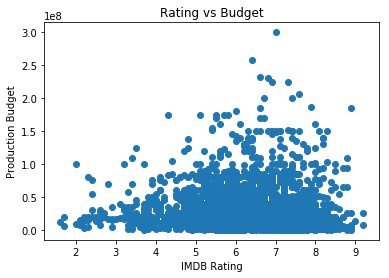

In [11]:
# Relationship between movie budget and rating

plt.scatter(movies['IMDB Rating'],movies['Production Budget'])
plt.title('Rating vs Budget')
plt.xlabel('IMDB Rating')
plt.ylabel('Production Budget')

Here, I was trying to examine the relationship between Production Budget and IMDB Rating. Do movies that have a high budget, tend to get better ratings? 

From the graphs, it does not look like it. We observe that a huge chunk of movies dont have a very high budget. We can also observe a few outliers (very high budget but an average rating)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002337812C588>]],
      dtype=object)

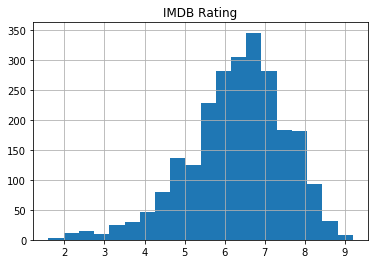

In [12]:
# distribution of the IMBD ratings for movies
movies.hist(column = 'IMDB Rating', bins=20)

Here, we can observe that most of the movie ratings are between 6 and 7. 

In [4]:
# Sum of NA values per column

movies.isnull().sum()

id                           0
title                        0
imdbID                       0
year                         0
rtID                        34
rtAllCriticsRating           0
rtAllCriticsNumReviews       0
rtAllCriticsNumFresh         0
rtAllCriticsNumRotten        0
rtAllCriticsScore            0
rtTopCriticsRating           0
rtTopCriticsNumReviews       0
rtTopCriticsNumFresh         0
rtTopCriticsNumRotten        0
rtTopCriticsScore            0
rtAudienceRating             0
rtAudienceNumRatings         0
rtAudienceScore              0
US Gross                     0
Worldwide Gross              0
US DVD Sales              2038
Production Budget            1
MPAA Rating                445
Running Time (min)        1451
Distributor                120
Source                     205
Major Genre                160
Creative Type              259
Director                   915
IMDB Rating                 35
IMDB Votes                  35
dtype: int64

Limitation:

Here we can observe that there are many missing or NA values for entries in many columns. For eg. "US DVD Sales" has 2038 missing values. Also, 1451 entries are missing for "Running Time". This is one of the main limitations. Part of the actual data is itself missing. Apart from this, there are also a few invalid entries for numerical values in some columns. All these values need to be cleaned correctly before using the data for modelling.

### 1.2. Consistency between movie ratings (8 pts)

Next, we will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

Step 1. Your EDA plan:

In [30]:
# Clean up the data. Convert all \N to 0's so that it will be easy to perform calculations

for i in movies.columns:
    movies[i][movies[i].apply(lambda i: True if str(i)=='\\N' else False)]=0

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
# create new column with difference in ratings
movies['RatingsDelta'] = pd.to_numeric(movies['rtAllCriticsRating']) - (pd.to_numeric(movies['rtAudienceRating']) * 2)

movies.head()

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes,RatingsDelta
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0,1.6
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0,-0.8
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0,-0.2
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0,0.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0,0.6


In [43]:
# Subset the columns
df_deltaRatings = movies.filter(['title','RatingsDelta'], axis=1)

In [47]:
df_deltaRatings.sort_values(by='RatingsDelta', ascending=False).head(10)

,title,RatingsDelta
1873,Show Boat,9.4
613,Roger & Me,8.8
239,Rebecca,8.7
1784,Red River,8.6
1470,She Wore a Yellow Ribbon,8.3
197,The Hunchback of Notre Dame,8.3
332,Stand by Me,7.8
1261,The Misfits,7.8
251,A Farewell to Arms,7.6
279,Willy Wonka & the Chocolate Factory,7.5


Above are the top 10 movies where the <b> Critics ratings were greater than the audiance ratings. </b> The critics for these movies might have been biased about the movie, or it might have been a paid review.

In [48]:
df_deltaRatings.sort_values(by='RatingsDelta', ascending=True).head(10)

,title,RatingsDelta
1939,Veer-Zaara,-8.4
2010,The Princess and the Cobbler,-7.4
1710,The Blood of Heroes,-7.2
1366,Lone Wolf McQuade,-6.8
547,There's Something About Mary,-6.2
914,Under the Rainbow,-6.2
1042,Possession,-5.8
1888,Shalako,-5.8
966,The Boondock Saints,-4.4
2002,Diary of a Mad Black Woman,-4.1


Above are the top 10 movies where the <b>audiance rating is greater than the critics ratings. </b> This could be because the movie was about something controvertial, political, etc where the critics did not like the movie at all but the audience enjoyed it a lot. Or this could even be possible if the movie is a regional movie and the critics were not able to relate the dialoges or contect of the movie but the audience really enjoyed the movie.

## Part 2 - Analyzing Movie Reviews* (20 pts)

*This part is adapted from INFX 574 - Core Methods in Data Science Problem Set 5.

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review. I have imported the dataset for you.

In [6]:
# Import movie reviews data
df_reviews = pd.read_csv("a3-reviews.csv")

In [7]:
df_reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story


In [8]:
# Add flag column. If rotten, then value = 1. Else value = 0
df_reviews['rotten_flag'] = df_reviews['fresh'].map( {'rotten': 1, 'fresh': 0, 'none':-1} ).astype(int)

# Choose only rows with 'rotten_flag' != -1
df_reviews_final = df_reviews[df_reviews['rotten_flag']!=-1]


# Adding column to capture length of review for each review
df_reviews_final['length'] = df_reviews_final['quote'].apply(len)
df_reviews_final.head(10)

C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,critic,fresh,imdb,link,publication,quote,review_date,rtid,title,rotten_flag,length
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story,0,137
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story,0,33
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story,0,79
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story,0,107
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story,0,110
5,Michael Booth,fresh,114709,http://www.denverpost.com/movies/ci_5786068,Denver Post,"As Lion King did before it, Toy Story revived ...",2007-05-03 00:00:00,9559,Toy Story,0,238
6,Geoff Andrew,fresh,114709,http://www.timeout.com/film/reviews/79673/toy_...,Time Out,The film will probably be more fully appreciat...,2006-06-24 00:00:00,9559,Toy Story,0,185
7,Janet Maslin,fresh,114709,http://movies.nytimes.com/movie/review?res=990...,New York Times,Children will enjoy a new take on the irresist...,2003-05-20 00:00:00,9559,Toy Story,0,156
8,Kenneth Turan,fresh,114709,http://www.calendarlive.com/movies/reviews/cl-...,Los Angeles Times,Although its computer-generated imagery is imp...,2001-02-13 00:00:00,9559,Toy Story,0,187
9,Roger Ebert,fresh,114709,http://www.rogerebert.com/reviews/toy-story-1995,Chicago Sun-Times,The result is a visionary roller-coaster ride ...,2000-01-01 00:00:00,9559,Toy Story,0,57


In [ ]:
# ------------------------------------------------- BACKUP ------------------------------------------------------
# df_reviews_final.to_csv('FinalReviews.csv')

fresh     8389
rotten    5030
Name: fresh, dtype: int64


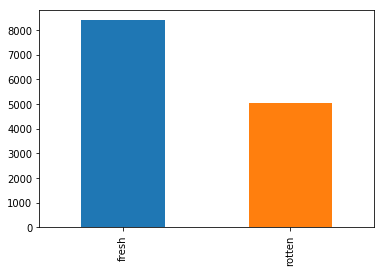

In [9]:
# print value counts for rotten and fresh
print(df_reviews_final['fresh'].value_counts())
df_reviews_final['fresh'].value_counts().plot.bar()

We can observe that there are 8389 fresh reviews and 5030 rotten reviews.

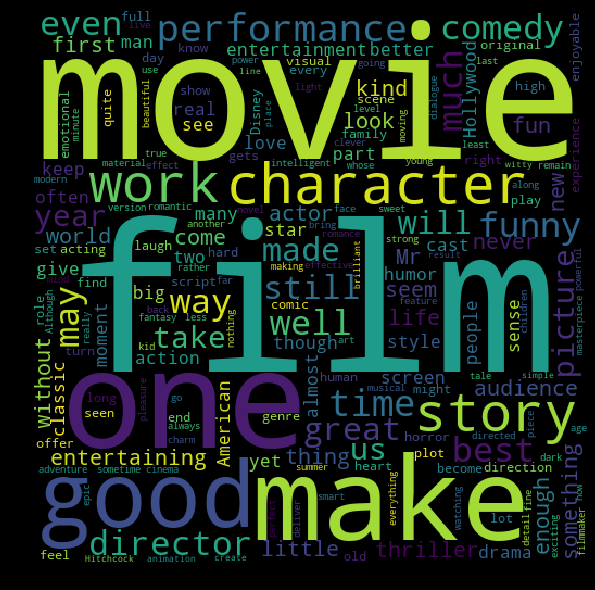

In [65]:
# Wordclouds for fresh and rotten words

from wordcloud import WordCloud
# Wordcloud for fresh message
fresh_words = ''.join(list(df_reviews_final[df_reviews_final['rotten_flag']==0]['quote']))
fresh_wc = WordCloud(width= 512, height = 512).generate(fresh_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(fresh_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

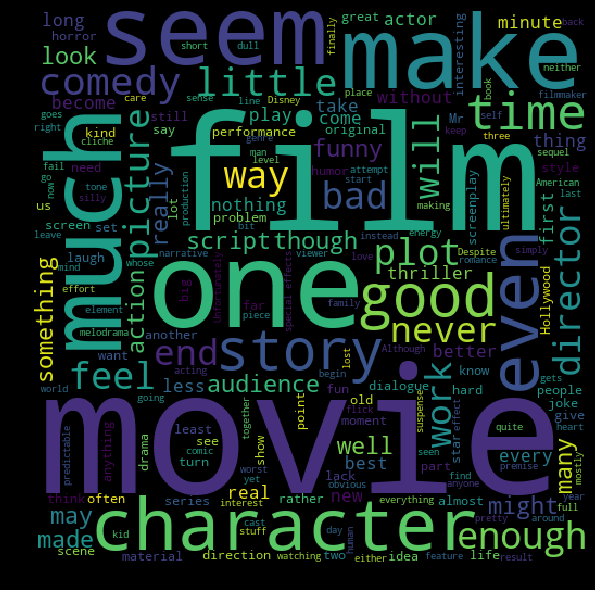

In [66]:
# Wordcloud for rotten message
rotten_words = ''.join(list(df_reviews_final[df_reviews_final['rotten_flag']==1]['quote']))
rotten_wc = WordCloud(width= 512, height = 512).generate(rotten_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(rotten_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the 2 wordclouds, we cannot clearly make out if there are any distinct words in rotten or fresh reviews. Looks like we need to perform more analysis! 

### 2.1 Text Cleaning and Unigram Representation (5 pts)

Before we get into the text classification, let's spend some time work with the reviews text! 

Are the reviews clean enough to you? As we will use bag-of-words representation here, we want to reduce the sparse representation. In this part, you will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, you will tokenize the reviews; in other words, you are going to convert your text fields into "bag of words" vectors.
One thing that may help you in the following problems is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Make sure you read the function documentation and review the lab demos to understand how the process goes. Eventually, you will get a bag-of-words array from your reviews data. Name your complete feature set as X and your target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to your model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from your model.

In [10]:
import string
from nltk.corpus import stopwords

# Choose only english stop words
eng_SW = stopwords.words("english")

In [11]:
# define the function to remove stop words
def remove_punctuation_and_stopwords(message):
    
    # remove punctuation characters using list comprehension
    msg_no_punctuation = [char for char in message if char not in string.punctuation]
    msg_no_punctuation = "".join(msg_no_punctuation).split() # join each word and then split at spaces
    
    # remove stopwords and create new list of words
    msg_no_punctuation_no_stopwords = [word.lower() for word in msg_no_punctuation if word.lower() not in eng_SW]
    return msg_no_punctuation_no_stopwords

In [12]:
# fit bag of words model by removing punctuations and stop words (using remove_punctuation_and_stopwords function)
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words_model_object = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(df_reviews_final['quote'])

In [13]:
sample = bag_of_words_model_object.vocabulary_ # sample will be a dict of words as keys and the count as their values
print("There are",len(sample),"unique words after cleaning the messages in the bag of words")
# print(sample)

There are 23318 unique words after cleaning the messages in the bag of words


In [14]:
# Create the document-term matrix for all predictor variables
document_term_matrix_WC = bag_of_words_model_object.transform(df_reviews_final['quote'])

In [15]:
# Calculate the tf-idf values of each element
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer_object = TfidfTransformer().fit(document_term_matrix_WC)
tfidf_feature_matrix = tfidf_transformer_object.transform(document_term_matrix_WC)

In [16]:
print("Dimensions of matrix: ",tfidf_feature_matrix.shape)
print("Total number of elements in the feature matrix =",tfidf_feature_matrix.shape[0]*tfidf_feature_matrix.shape[1])
print("Total number of non-zero elements in the matrix =",tfidf_feature_matrix.nnz)

# Calculate the sparsity of the matrix
print("Sparsity =",(tfidf_feature_matrix.nnz/(tfidf_feature_matrix.shape[0]*tfidf_feature_matrix.shape[1]))*100)

Dimensions of matrix:  (13419, 23318)
Total number of elements in the feature matrix = 312904242
Total number of non-zero elements in the matrix = 151729
Sparsity = 0.04849055386088374


##### We can see that only around 0.05% of the matrix is dense (i.e. contains tf-idf scores other than 0).

### 2.2 Train-Test Split (5 pts)

Next, randomly split the data into a training set (67%) and a test set (33%).  One function that may be very helpful is [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Read the documentation and our previous lab demos to understand how the function works.

Name the training set as **X_train** and the corresponding labels as **Y_train**; similarly, name the test set as **X_test** and their labels as **Y_test**.

In [17]:
from sklearn.model_selection import train_test_split

# randomly split the dataset into train and test with 67% of the data in the training set and 33% in the test set
X_train, X_test, y_train, y_test = train_test_split(df_reviews_final["quote"], df_reviews_final["rotten_flag"], test_size=0.33, random_state=5)


In [18]:
X_train[8121]

"The Mask of Zorro stands as a pointed riposte to those who say they don't make 'em like that anymore."

### 2.3 Extra Credits ($\leq$ 4 pts): Tuning Hyperparameters

We want to use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

That calling MultinomialNB() allows us to create a default NB model. However, we often need to tune the hyperparameters of the model for a better performance. Remember the technique for hyperparameters tuning we talked about previously? Cross validation!

The two most important hyperparameters are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters. The objective function we want to maximize is the **log-likelihood** of our data (the function provided below).  Fill in the remaining code in the block below, to loop over many values of `alpha` and `min_df` to determine which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, [`sklearn.model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), that might save you a lot of time here...*

In [102]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(fitted_model, x, y):
    prob = fitted_model.predict_log_proba(x)
    #find rotten or fresh in the target
    rotten = y == 1
    fresh = ~rotten
    #the first column of prob indicates the log likelihood of being rotten, while the second ... being fresh
    return prob[rotten, 1].sum() + prob[fresh, 0].sum()

In [ ]:
#Now it's your turn to find the "best" value for alpha and min_df among these candidates using cross validation
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# initialize
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for alpha in alphas:
    for minDf in min_dfs:
        bag_of_words_model_object = CountVectorizer(min_df = minDF, analyzer = remove_punctuation_and_stopwords).fit(df_reviews_final['quote'])
        document_term_matrix_WC = bag_of_words_model_object.transform(df_reviews_final['quote'])
        
        # brief steps to perform hyperparameter tuning ...
        # 0. tokenize the reviews with the current min_df value
        # 1. split the training set into a (k-1) folds training and the remaining fold to be the validation set
        # 2. create a NB model using the current alpha candidate
        # 3. run k-fold crossvalidation and specify log_likelihood function to be the scoring method
        # 4. compare the current performance to the best performance "so far". If greather than the record, update them!

# Finally, report the "best" value for alpha and min_df

In [105]:
scores = []
bag_of_words_model_object = CountVectorizer(min_df = 1e-5, analyzer = remove_punctuation_and_stopwords).fit(df_reviews_final['quote'])
document_term_matrix_WC = bag_of_words_model_object.transform(df_reviews_final['quote'])

tfidf_transformer_object = TfidfTransformer().fit(document_term_matrix_WC)
tfidf_feature_matrix = tfidf_transformer_object.transform(document_term_matrix_WC)

rotten_detect_model = MultinomialNB(alpha = 0.1).fit(tfidf_feature_matrix, df_reviews_final['quote'])




MemoryError: 

### 2.4 Rotten or Fresh? Reviews Classification using Naive Bayes (5 pts)
Now let's train a Naive Bayes classifier!
* If you have completed the Part 2.3, use the hyperparameters that you chose from cross validation.
* If you haven't tuned the model, you may start with a default NB model and perhaps apply your instinct and wisdom to decide the hyperparameters.

Report the accuracy of this model on both the training (67%) and test data (33%).  What do you observe?  Interpret these results!

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

''' Use Pipeline to sequentially apply an intermediate list of 
    transforms and fits to obtain a final estimator. The final estimator should
    only implement fit with the training data to train the model. 
'''

pipe_MNB = Pipeline([('bow'  , CountVectorizer(min_df = 1e-4, analyzer = remove_punctuation_and_stopwords) ),
                     ('tfidf'   , TfidfTransformer()),
                     ('clf_MNB' , MultinomialNB(alpha=0.1)),
                    ])

In [51]:
# Fit the model to the training data
pipe_MNB.fit(X = X_train, y = y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000002E231367BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=0.0001, ngram_...r_tf=False, use_idf=True)), ('clf_MNB', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [52]:
from sklearn.metrics import accuracy_score

# Predict the values for the test data set
y_pred_MNB = pipe_MNB.predict(X_test)


# Calculate the accuracy of the classification
accuracy_ratio = accuracy_score(y_test,y_pred_MNB) # proportion of correct predictions
print("MNB predicted reviews with an accuracy of",accuracy_ratio*100,"%")

MNB predicted reviews with an accuracy of 75.79589072025288 %


Discussion: Here, I was able to observe that for min_df = 1e-4 and alpha = 0.1, the accuracy of the model was 75.8%

The model has ignored words that have a frequency below 0.0001 (i.e. 1 in 10000). By decreasing aplha from 1 (default value) to 0.1, we are making the model more sensitive to select features.

### 2.5 Extra Credits ($\leq$ 2 pts): Adding Text Normalization
Previously, we cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. Use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.4.

In [54]:
# from nltk.stem.porter import *
stemmer = PorterStemmer()

In [67]:
def stem_message(message):
    
    # remove punctuation characters using list comprehension
    msg_no_punctuation = [char for char in message if char not in string.punctuation]
    msg_no_punctuation = "".join(msg_no_punctuation).split() # join each word and then split at spaces
    
    # remove stopwords and create new list of words
    msg_no_punctuation_no_stopwords = [word.lower() for word in msg_no_punctuation if word.lower() not in eng_SW]
    
    stemmed_word_list = [stemmer.stem(word) for word in msg_no_punctuation_no_stopwords]
    # print(stemmed_word_list)
    
    return stemmed_word_list

In [68]:
pipe_MNB = Pipeline([('bow'  , CountVectorizer(min_df = 1e-4, analyzer = stem_message) ),
                     ('tfidf'   , TfidfTransformer()),
                     ('clf_MNB' , MultinomialNB(alpha=0.1)),
                    ])

In [69]:
# Fit the model to the training data
pipe_MNB.fit(X = X_train, y = y_train)

# Predict the values for the test data set
y_pred_MNB = pipe_MNB.predict(X_test)


# Calculate the accuracy of the classification
accuracy_ratio = accuracy_score(y_test,y_pred_MNB) # proportion of correct predictions
print("MNB predicted reviews with an accuracy of",accuracy_ratio*100,"%")

MNB predicted reviews with an accuracy of 75.07337999548432 %


### 2.6 Interpretation (5 pts)
What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [71]:
print(bag_of_words_model_object.vocabulary_)

{'ingenious': 10523, 'concept': 4181, 'design': 5456, 'execution': 7034, 'could': 4560, 'watch': 22547, 'postage': 15552, 'stampsized': 19480, 'screen': 17865, 'still': 19631, 'engulfed': 6691, 'charm': 3407, 'years': 23196, 'inventive': 10792, 'comedy': 4002, 'winning': 22935, 'animated': 1025, 'feature': 7468, 'something': 19071, 'everyone': 6943, 'age': 652, 'spectrum': 19231, 'film': 7609, 'sports': 19351, 'provocative': 16028, 'appealing': 1161, 'story': 19702, 'thats': 20684, 'every': 6939, 'bit': 2226, 'equal': 6811, 'technical': 20513, 'achievement': 425, 'entertaining': 6751, 'computergenerated': 4158, 'hyperrealist': 10054, 'animation': 1028, '1995': 161, 'also': 841, 'effect': 6411, 'toy': 21149, 'catalog': 3219, 'lion': 11923, 'king': 11315, 'revived': 17113, 'art': 1306, 'american': 899, 'childrens': 3526, 'ushered': 22080, 'set': 18189, 'smart': 18866, 'movies': 13409, 'entertained': 6748, 'children': 3525, 'parents': 14759, 'landmark': 11518, 'movie': 13396, 'doesnt': 59

## Part 3 - Analyzing Networks (14 pts)

### 3.1. Understanding Classic Centrality Measures* (6 pts)
*This part is adapted from INFX 576: Social Network Analysis

Please describe possible network configurations/local properties that fit each white cell (six in total) except for diagonal cells:

|                  | Low Degree | Low Betweenness | Low Closeness |
|------------------|------------|-----------------|---------------|
| High Degree      |    NA      |                 |               |
| High Betweenness |            |      NA         |               |
| High Closeness   |            |                 |       NA      |

Your response:

### 3.2. Understanding Nodes, Degree and Density (8 pts)

In this question, we will explore an [organizational chart](https://en.wikipedia.org/wiki/Organizational_chart) that shows the structure of an organization and the relationships and relative ranks of its parts and positions/jobs. The nodes represent positions and the edges represent supervision relationships.

#### 3.2.1. (2 pts) Construct the network and report the size of the network including the number of nodes and edges. 

I have imported the data for you :D

In [99]:
# This reads the CSV file. Not a network yet.
EdgesAsDF = pd.read_csv('organizational_chart.txt', delimiter='\t')
# This reads the node labels
position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t',index_col = 'node')

In [100]:
# Take a look at the network dataframe data
print(EdgesAsDF.head())
print(EdgesAsDF.shape)

   to  from
0   1     2
1   1     3
2   1     4
3   1     5
4   2     6
(15, 2)


Here we have 15 nodes (positions in the company) and each node has 2 features (to and from)

In [101]:
# Take a look at the network labels
# you can use .relabel_nodes() method to update node labels after you have constructed the network
# read the doc: https://networkx.github.io/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html
print(position_labels)

                    position
node                        
1                  President
2        VP Account Services
3       VP Creative Services
4      VP Marketing Services
5     VP Management Services
6         Account Supervisor
7         Account Supervisor
8                   Art/Copy
9                 Production
10                     Media
11                  Research
12                Accounting
13                Purchasing
14                 Personnel
15         Account Executive
16         Account Executive


In [113]:
# Now it's your turn to construct the network from the edgelist
# Your codes here


graph = net.read_edgelist('organizational_chart.txt', create_using = net.Graph())

print(net.info(graph))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 16
Average degree:   1.7778


C:\Users\ashwi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


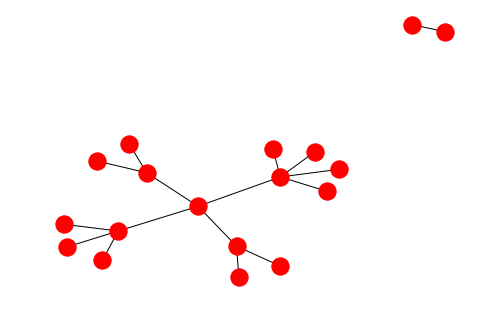

In [114]:
# you might also consider create a visualization to present the network
net.draw(graph)

#### 3.2.2. (2 pts) Report the degree of each node and plot a histogram to show the degree distribution of this network

(array([13.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

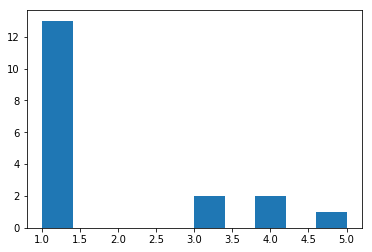

In [118]:
# Your codes here - report degre and plot degree distribution histogram
d1 = dict(net.degree(graph))
l1 = list(d1.values())

# plot histogram of degrees of each node
plt.hist(l1)


#### 3.2.3. (4 pts) Which position is most influential in this network? Compute and compare three types of centrality (i.e. degree, betweenness and closeness centrality).  Discuss your findings.

In [122]:
centrality = net.degree_centrality(graph)
betweenness = net.betweenness_centrality(graph)
closeness = net.closeness_centrality(graph)
print("Centrality:\n",centrality)
print("\n\nBetweenness: \n'",betweenness)
print("\n\nCloseness: \n",closeness)

Centrality:
 {'to': 0.058823529411764705, 'from': 0.058823529411764705, '1': 0.23529411764705882, '2': 0.29411764705882354, '3': 0.1764705882352941, '4': 0.1764705882352941, '5': 0.23529411764705882, '6': 0.058823529411764705, '7': 0.058823529411764705, '8': 0.058823529411764705, '9': 0.058823529411764705, '10': 0.058823529411764705, '11': 0.058823529411764705, '12': 0.058823529411764705, '13': 0.058823529411764705, '14': 0.058823529411764705, '15': 0.058823529411764705, '16': 0.058823529411764705}


Betweenness: 
' {'to': 0.0, 'from': 0.0, '1': 0.6102941176470588, '2': 0.3676470588235294, '3': 0.19852941176470587, '4': 0.19852941176470587, '5': 0.2867647058823529, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0}


Closeness: 
 {'to': 0.058823529411764705, 'from': 0.058823529411764705, '1': 0.5090497737556561, '2': 0.41360294117647056, '3': 0.36764705882352944, '4': 0.36764705882352944, '5': 0.38927335640138405, '6': 0

Discussion: If we observe the 2 dictionaries, node 2 (VP Account Services) has the highest degree centrality, node 1(President) has the highest betweenness and node 1(President) again has the highest closeness values. Different nodes have different values.

#### 3.2.4. Extra Credits ($\leq$ 4 pts): In general, find the density of an arbitrary formal hierarchy (e.g.  an organizational chart) as a function of organizational size. Justify your answer.